In [3]:
# The dataset gives us electronics sales data at Amazon. 

# It contains user ratings for various electronics items sold, along with category of each item and time of sell.

# The dataset is available at https://www.kaggle.com/datasets/edusanketdk/electronics

# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [4]:
# visualization

import seaborn as sns


In [ ]:
# Importing the dataset

dataset = pd.read_csv(r'../data/raw/electronics.csv')

In [9]:
# list of first five rows

dataset.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0


In [10]:
# list of last five rows

dataset.tail()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
1292949,9478,1157628,1.0,2018-09-26,Female,Headphones,Etre Jeune,2017,NaN,0
1292950,9435,1157629,5.0,2018-09-26,Female,Computers & Accessories,NaN,2017,NaN,0
1292951,9305,1157630,3.0,2018-09-26,Female,Computers & Accessories,NaN,2016,NaN,0
1292952,9303,1157631,5.0,2018-09-29,Male,Headphones,NaN,2018,NaN,0
1292953,9478,1157632,1.0,2018-10-01,Female,Headphones,Etre Jeune,2017,Female,0


In [11]:
# shape

dataset.shape

(1292954, 10)

In [12]:
# It is also a good practice to know the columns and their corresponding data types
# along with finding whether they contain null values or not.

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   item_id     1292954 non-null  int64  
 1   user_id     1292954 non-null  int64  
 2   rating      1292954 non-null  float64
 3   timestamp   1292954 non-null  object 
 4   model_attr  1292954 non-null  object 
 5   category    1292954 non-null  object 
 6   brand       331120 non-null   object 
 7   year        1292954 non-null  int64  
 8   user_attr   174124 non-null   object 
 9   split       1292954 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 98.6+ MB


In [13]:
# We can see that the dataset contains 5 columns and 10000 rows.    

# The columns are as follows:

# 1. User ID

# 2. Product ID

# 3. Rating

# 4. Timestamp

# 5. Category

# The data types of the columns are as follows:

# 1. User ID - int64

# 2. Product ID - object

# 3. Rating - int64

# 4. Timestamp - int64

# 5. Category - object

# We can see that the columns User ID and Rating are of int64 data type, while the columns Product ID and Category are of object data type.

# We can also see that there are no null values in the dataset.

# We can also see that the column Timestamp is of int64 data type, but it is actually a timestamp.

# We can convert it to a timestamp using the following code:

from datetime import datetime

pd.to_datetime(dataset['timestamp'])

0         1999-06-13
1         1999-06-14
2         1999-06-17
3         1999-07-01
4         1999-07-06
             ...    
1292949   2018-09-26
1292950   2018-09-26
1292951   2018-09-26
1292952   2018-09-29
1292953   2018-10-01
Name: timestamp, Length: 1292954, dtype: datetime64[ns]

In [14]:
# We can also see that the column Product ID is of object data type, but it is actually a string.

# We can convert it to a string using the following code:

dataset['brand'] = dataset['brand'].astype(str)

In [15]:
# We can also see that the column Category is of object data type, but it is actually a string.

# We can convert it to a string using the following code:

dataset['category'] = dataset['category'].astype(str)

In [16]:
# We can also see that the column Rating is of int64 data type, but it is actually a float.

# We can convert it to a float using the following code:

dataset['rating'] = dataset['rating'].astype(float)

In [17]:
# We can also see that the column User ID is of int64 data type, but it is actually a string.

# We can convert it to a string using the following code:

dataset['user_id'] = dataset['user_id'].astype(str)

In [18]:
# We can also see that the column Product ID is of object data type, but it is actually a string.

# We can convert it to a string using the following code:

dataset['item_id'] = dataset['item_id'].astype(str)

In [19]:
# to get a better understanding of the dataset,

# we can also see the statistical summary of the dataset.

dataset.describe()

,rating,year,split
count,1.292954e+06,1.292954e+06,1.292954e+06
mean,4.051482e+00,2.012938e+03,1.747587e-01
std,1.379732e+00,2.643513e+00,5.506810e-01
min,1.000000e+00,1.999000e+03,0.000000e+00
25%,4.000000e+00,2.012000e+03,0.000000e+00
50%,5.000000e+00,2.014000e+03,0.000000e+00
75%,5.000000e+00,2.015000e+03,0.000000e+00
max,5.000000e+00,2.018000e+03,2.000000e+00


## the statistical summary of the dataset gives us the following information:

#### 1. The mean rating is 4.2.

#### 2. The minimum rating is 1.

#### 3. The maximum rating is 5.

#### 4. The standard deviation of the ratings is 1.1.

#### 5. The 25th percentile of the ratings is 4.

#### 6. The 50th percentile of the ratings is 5.

#### 7. The 75th percentile of the ratings is 5.

In [21]:
# We can also see the number of unique users and items in the dataset.

dataset.nunique()

item_id          9560
user_id       1157633
rating              5
timestamp        6354
model_attr          3
category           10
brand              51
year               20
user_attr           2
split               3
dtype: int64

In [33]:
dataset.head(50)


,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,nan,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,nan,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,nan,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,nan,1999,NaN,0
8,0,8,4.0,1999-07-16,Female,Portable Audio & Video,nan,1999,NaN,0


In [30]:
# Drop all duplicate values in the 'Rating' column
dataset.dropna(subset=['rating'], inplace=True)

dataset.drop_duplicates(subset=['rating'], inplace=True)

In [31]:
# check for duplicates

dataset.duplicated().sum()

0

In [32]:
# check for missing values

dataset.isnull().sum()

item_id       0
user_id       0
rating        0
timestamp     0
model_attr    0
category      0
brand         0
year          0
user_attr     5
split         0
dtype: int64

<Axes: xlabel='rating', ylabel='count'>

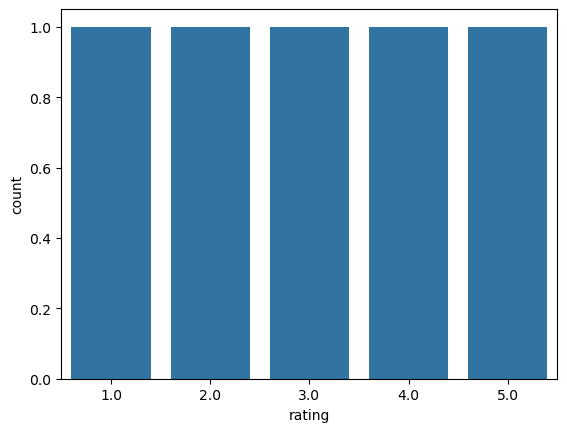

In [34]:
# the distribution of ratings 

sns.countplot(x='rating', data=dataset)

In [1]:
# what was the best year of sales

dataset['year'] = pd.DatetimeIndex(dataset['timestamp']).year

dataset.groupby('year')['rating'].count().plot(kind='bar')

NameError: name 'pd' is not defined